In [30]:
import tensorflow as tf
import pickle
import numpy as np
import timeit
import datetime
from keras.models import Sequential
from keras.layers import Conv2D, Dense, AveragePooling2D, MaxPooling2D ,Dropout, Flatten
import matplotlib.pyplot as plt
import keras_tuner as kt
import tensorflow.keras as keras
from tensorflow.keras import regularizers

In [3]:
from load_cifar import load_training_batch
from load_cifar import load_testing_batch
from load_cifar import features_reshape
from load_cifar import display_data_stat
from load_cifar import preprocess_data
import load_cifar

<h1>Hyperparameter</h1>

In [4]:
path = "cifar-10-batches-py"

In [5]:
preprocess_data(path)

(45000,)
(45000, 10)


<h1>Placeholder</h1>

In [6]:
def plot_cifar(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i])
        plt.xticks([])
        plt.yticks([])
plt.show()

<h1>LeNet-5</h1>

In [27]:
"""
Define Lenet-5 model
"""
model = Sequential()
# convolution 1
model.add(Conv2D(filters=6, kernel_size=(5,5), strides=1, activation="Relu", input_shape=(32, 32, 3)))
# pooling 1 (subsampling)
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# convolution 2
model.add(Conv2D(filters=16, kernel_size=(5,5), strides=1, activation="Relu"))
# pooling 2 (subsampling)
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# flatten the convolution to connect with full connectted layer
model.add(Flatten())
# Fully connected layer
model.add(Dense(84, activation="tanh"))
# output layer
model.add(Dense(10, activation="softmax"))

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"],
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 84)                33684     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

<h1>Training, validation and testing</h1>
<h2>Train your model only 10 epochs.</h2>
<h2>1.Print out validation accuracy after each training epoch</h2>
<h2>2.Print out training time for each training epoch</h2>
<h2>3.Print out testing accuracy</h2>

In [7]:
val_features, val_labels = pickle.load(open('val_data.pickle','rb'))
train_features,train_labels = pickle.load(open('train_data.pickle','rb'))
test_features, test_labels = pickle.load(open('test_data.pickle','rb'))
train_features = load_cifar.features_reshape(train_features)
val_features = load_cifar.features_reshape(val_features)
test_features = load_cifar.features_reshape(test_features)

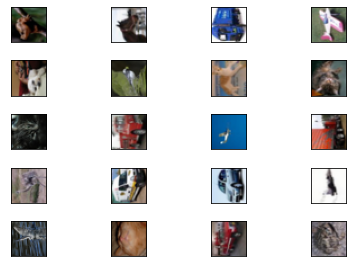

In [13]:
plot_cifar(train_features, train_labels)

In [14]:
print('Train: X=%s, y=%s' % (train_features.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_features.shape, test_labels.shape))
print(train_labels)

Train: X=(45000, 32, 32, 3), y=(45000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]], shape=(45000, 10), dtype=float32)


In [28]:
history = model.fit(train_features, train_labels, epochs=15, validation_data=(val_features, val_labels))

Epoch 1/15
1407/1407 [==============================] - 7s 5ms/step - loss: 2.0520 - accuracy: 0.2408 - val_loss: 1.8810 - val_accuracy: 0.3024
Epoch 2/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.7931 - accuracy: 0.3542 - val_loss: 1.7100 - val_accuracy: 0.3698
Epoch 3/15
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6917 - accuracy: 0.3925 - val_loss: 1.6160 - val_accuracy: 0.4114
Epoch 4/15
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6117 - accuracy: 0.4201 - val_loss: 1.5716 - val_accuracy: 0.4322
Epoch 5/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5500 - accuracy: 0.4422 - val_loss: 1.4996 - val_accuracy: 0.4600
Epoch 6/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4935 - accuracy: 0.4649 - val_loss: 1.4938 - val_accuracy: 0.4664
Epoch 7/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4463 - accuracy: 0.4838 - val_loss: 1.4103 - val_accuracy:

In [29]:
model.evaluate(test_features, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.3231 - accuracy: 0.5250


[1.3231209516525269, 0.5249999761581421]

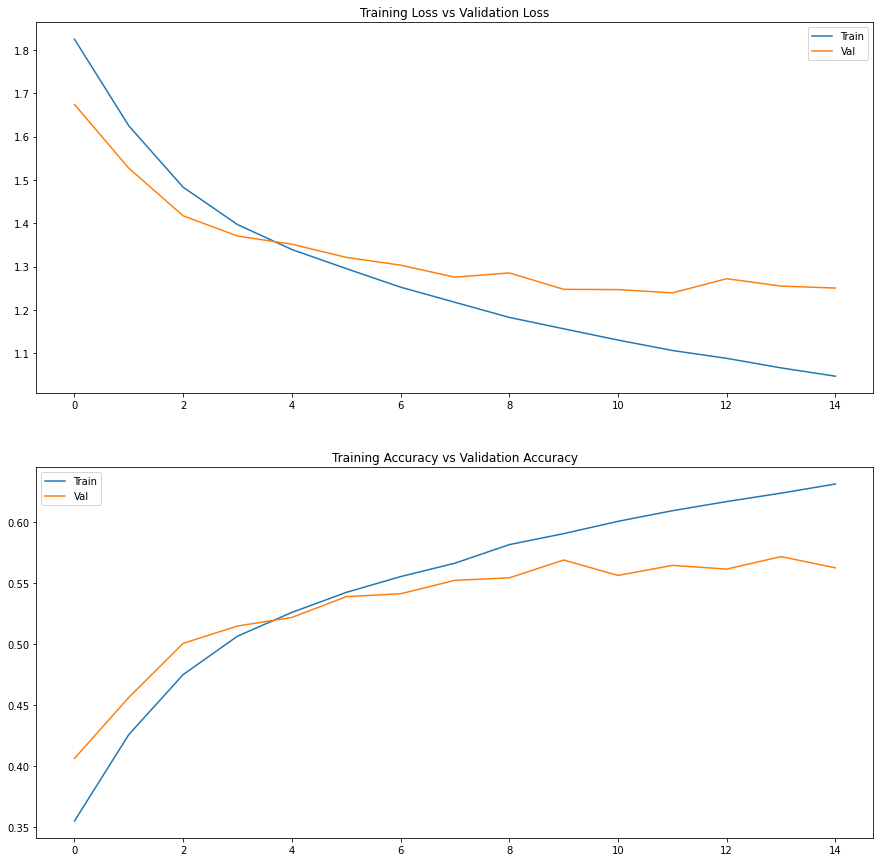

In [68]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

In [18]:
"""
Model for hp tuner
"""
def cifar_model(hp):
    """
    define model for hyper tune
    """
    model = keras.Sequential()
    weight_decay = 1e-4
    model.add(Conv2D(filters=6, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), activation="elu", input_shape=(32, 32, 3)))
    for i in range(hp.Int("cnn_layers", 1, 2)):
        model.add(Conv2D(
            hp.Int(f"filters_{i}", 4, 128, step=16),
            kernel_size=(3, 3),
            kernel_regularizer=regularizers.l2(weight_decay),
            activation="elu"))
        model.add(Conv2D(
            hp.Int(f"filters_{i}", 4, 128, step=16),
            kernel_size=(3, 3),
            kernel_regularizer=regularizers.l2(weight_decay),
            activation="elu"))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid'))
        model.add(keras.layers.BatchNormalization())
        model.add(Dropout(0.1*i))
    model.add(Conv2D(
            hp.Int(f"filters_{i}", 4, 128, step=16),
            kernel_size=(3, 3),
            kernel_regularizer=regularizers.l2(weight_decay),
            activation="elu"))
    
    model.add(Flatten())
    """for i in range(hp.Int("num_layers", 2, 4)):
        model.add(Dense(
                units=hp.Int("units_" + str(i), min_value=16, max_value=256, step=16),
                activation="elu",))"""

    model.add(Dense(10, activation="softmax"))
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log', default=1e-3)),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=["accuracy"],
    )

    return model

In [20]:
tuner2 = kt.BayesianOptimization(
    cifar_model,
    objective="val_accuracy",
    max_trials=20,
    directory='my_dir',
    project_name='cifar_tuner_4')

tuner2.search_space_summary()

Search space summary
Default search space size: 3
cnn_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': None}
filters_0 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 128, 'step': 16, 'sampling': None}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [21]:
#START TUNING
tuner2.search(val_features, val_labels, epochs=5, validation_split=0.1)


Trial 20 Complete [00h 00m 08s]
val_accuracy: 0.3400000035762787

Best val_accuracy So Far: 0.578000009059906
Total elapsed time: 00h 03m 27s
INFO:tensorflow:Oracle triggered exit


In [24]:
best_hps = tuner2.get_best_hyperparameters()[0]
model = tuner2.hypermodel.build(best_hps)
history = model.fit(train_features,
                    train_labels,
                    batch_size=128,
                    epochs=15,
                    validation_data=(val_features, val_labels))

Epoch 1/15
352/352 [==============================] - 9s 22ms/step - loss: 1.4430 - accuracy: 0.5129 - val_loss: 3.5715 - val_accuracy: 0.2070
Epoch 2/15
352/352 [==============================] - 7s 19ms/step - loss: 0.9880 - accuracy: 0.6738 - val_loss: 1.1727 - val_accuracy: 0.6410
Epoch 3/15
352/352 [==============================] - 7s 19ms/step - loss: 0.8126 - accuracy: 0.7364 - val_loss: 1.1646 - val_accuracy: 0.6450
Epoch 4/15
352/352 [==============================] - 7s 19ms/step - loss: 0.7060 - accuracy: 0.7762 - val_loss: 0.9502 - val_accuracy: 0.7076
Epoch 5/15
352/352 [==============================] - 7s 19ms/step - loss: 0.6220 - accuracy: 0.8064 - val_loss: 0.7979 - val_accuracy: 0.7524
Epoch 6/15
352/352 [==============================] - 7s 19ms/step - loss: 0.5532 - accuracy: 0.8325 - val_loss: 0.8493 - val_accuracy: 0.7406
Epoch 7/15
352/352 [==============================] - 7s 19ms/step - loss: 0.4877 - accuracy: 0.8581 - val_loss: 1.0552 - val_accuracy: 0.6984

313/313 [==============================] - 1s 4ms/step - loss: 1.1469 - accuracy: 0.7515
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 6)         168       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 116)       6380      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 116)       121220    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 116)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 116)       464       
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 116)       0         
_______________________________

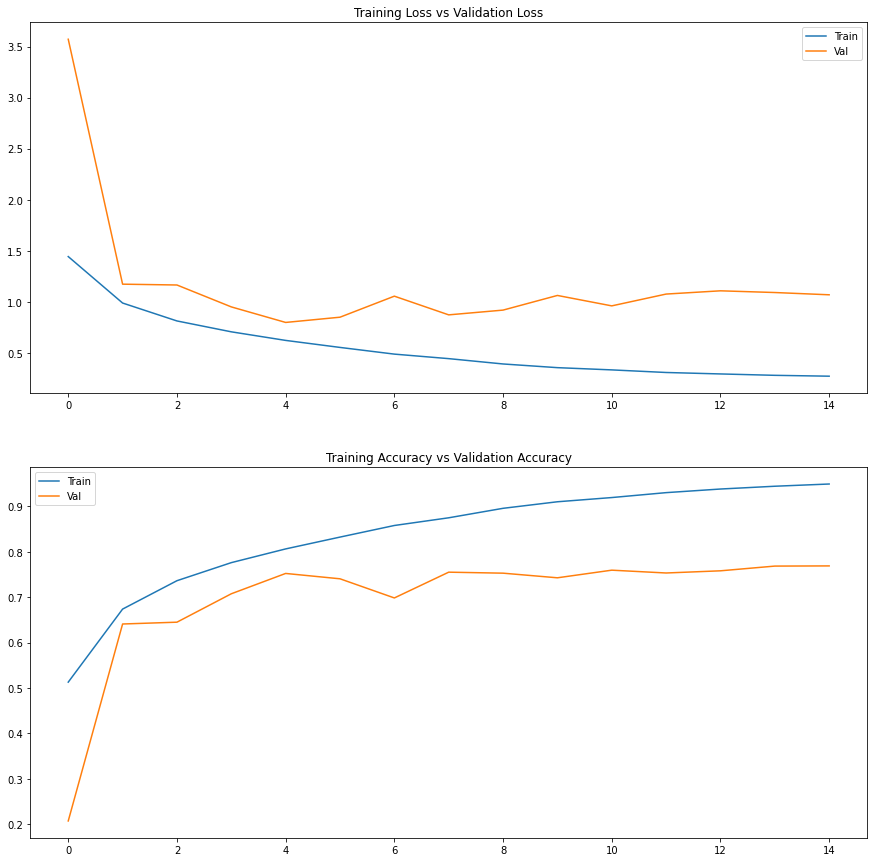

In [26]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])
model.evaluate(test_features, test_labels)
model.summary()